## **Parallelization Workflow**


In [32]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama

In [33]:
# Graph state
class AgentState(TypedDict):
    topic: str
    joke: str
    story: str
    poem: str
    combined_output: str

In [34]:
llm = ChatOllama(model="deepseek-v3.1:671b-cloud")

In [35]:
# Nodes
def call_llm_1(state: AgentState):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a joke about {state['topic']}")
    return {"joke": msg.content}


def call_llm_2(state: AgentState):
    """Second LLM call to generate story"""

    msg = llm.invoke(f"Write a story about {state['topic']}")
    return {"story": msg.content}


def call_llm_3(state: AgentState):
    """Third LLM call to generate poem"""

    msg = llm.invoke(f"Write a poem about {state['topic']}")
    return {"poem": msg.content}

In [36]:
def aggregator(state: AgentState):
    """Combine the joke, story and poem into a single output"""

    combined = f"Here's a story, joke, and poem about {state['topic']}!\n\n"
    combined += f"STORY:\n{state['story']}\n\n"
    combined += f"JOKE:\n{state['joke']}\n\n"
    combined += f"POEM:\n{state['poem']}"
    return {"combined_output": combined}

In [37]:
graph = StateGraph(AgentState)

# Add nodes
graph.add_node("call_llm_1", call_llm_1)
graph.add_node("call_llm_2", call_llm_2)
graph.add_node("call_llm_3", call_llm_3)
graph.add_node("aggregator", aggregator)

# Add edges to connect nodes
graph.add_edge(START, "call_llm_1")
graph.add_edge(START, "call_llm_2")
graph.add_edge(START, "call_llm_3")

graph.add_edge("call_llm_1", "aggregator")
graph.add_edge("call_llm_2", "aggregator")
graph.add_edge("call_llm_3", "aggregator")

graph.add_edge("aggregator", END)

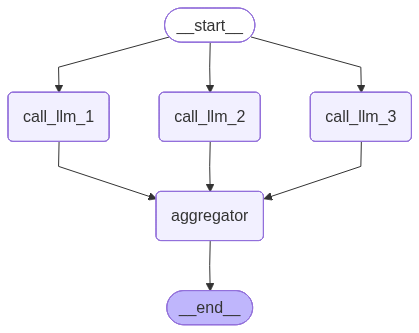

In [38]:
app = graph.compile()
app

In [39]:
# Invoke
state = app.invoke({"topic": "cats"})

In [40]:
print(state["combined_output"])

Here's a story, joke, and poem about cats!

STORY:
The world, for Barnaby, was a symphony of scents and a map of sunbeams. He was a creature of immense dignity, a ginger tabby of considerable girth, whose domain was the comfortable, slightly dusty house on Willow Lane. His days followed a sacred rhythm: a sunbeam on the Persian rug from nine to eleven, a strategic nap atop the linen cupboard from eleven to one, and a vigilant patrol of the backyard bird feeder in the afternoon.

Humans, he tolerated. They were useful for can-opening and chin-scratches, but their movements were erratic and their conversations lacked nuance. True conversation, Barnaby knew, happened in the silent blink of an eye, the slow twitch of a tail tip, the subtle arch of a back.

His peace was shattered on a Tuesday.

The humans brought it in—a small, squeaking, grey-and-white scrap of chaos bundled in a blanket. They called it "Pip." Barnaby, from his perch on the armchair, observed the newcomer with icy disdain